# 4. Other factors

 In this exercise we will see if there is any corolation between exam scores and factors such as social meadia hours and diet.

## Step 1: Import Libraries and Load Data

In this step, we prepare everything needed for data analysis:

- Import Python libraries for data handling and machine learning.
- Load the cleaned dataset.
- Check for any missing or duplicate values.

This ensures the data is ready for exploration and modeling.


In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set seaborn style for clean visuals
sns.set(style="whitegrid")

# Load dataset
student = pd.read_csv('../Data/CleanedData/simulated_data_cleaned.csv')

# Clean dataset (there are no duplicates or null values, so no action needed for deleting those)
print(student.isnull().sum())
print("Duplicate values: ", student.duplicated().sum())

student.head()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64
Duplicate values:  0


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,s1000,23,female,0.0,1.2,1.1,no,85.0,8.0,fair,6,master,average,8,yes,56.2
1,s1001,20,female,6.9,2.8,2.3,no,97.3,4.6,good,6,high school,average,8,no,100.0
2,s1002,21,male,1.4,3.1,1.3,no,94.8,8.0,poor,1,high school,poor,1,no,34.3
3,s1003,23,female,1.0,3.9,1.0,no,71.0,9.2,poor,4,master,good,1,yes,26.8
4,s1004,19,female,5.0,4.4,0.5,no,90.9,4.9,fair,3,master,good,1,no,66.4


In [414]:
student.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

## Step 2: Explore Correlations Using a Heatmap

We want to understand which variables are most strongly related to `exam_score`.

- Correlation values range from -1 to +1.
- Positive correlation: two variables increase together.
- Negative correlation: one increases while the other decreases.
- 0 = no relationship.

We'll use one-hot encoding for categorical variables, then plot a heatmap to visualize the correlations.

---


Below is an interpretation of how various factors correlate with `exam_score`, based on the correlation matrix.

#### Positive correlation with exam_score:

- **study_hours_per_day**: Not surprisingly the heatmap study hours a strong positive correlation with exam_score, indicating that the more a student studies, the higher their likelihood of achieving a high exam score.
- **attendance_percentage**: Also positively correlated – students with higher attendance tend to perform better in exams.
- **mental_health_rating**: Slight positive correlation – better mental health is associated with higher exam scores.
- **sleep_hours** and **exercise_frequency**: Weak but positive correlations, suggesting a potentially beneficial effect of a healthy lifestyle on academic performance.

#### Negative correlation with exam_score:

- **social_media_hours** and **netflix_hours**: Show weak negative correlations with exam_score. This suggests that spending more time on social media and Netflix may be associated with lower academic performance.
- **internet_quality_poor**: Weak negative correlation – poor internet quality may be a barrier to academic success.
- **diet_quality_poor**: Also negatively correlated – a poor diet is linked to lower exam scores.

#### Weak or no significant correlation:

Factors such as:
- **gender**
- **part_time_job**
- **extracurricular_participation**
- **parental_education_level**

...generally show weaker or unclear correlations with exam_score.

> Note: Correlation does not imply causation, but it helps us identify potential influencing factors worth further investigation in the BI process.


/Users/marcushjorth/Desktop/BI/BI-Exam-Student-Performance/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


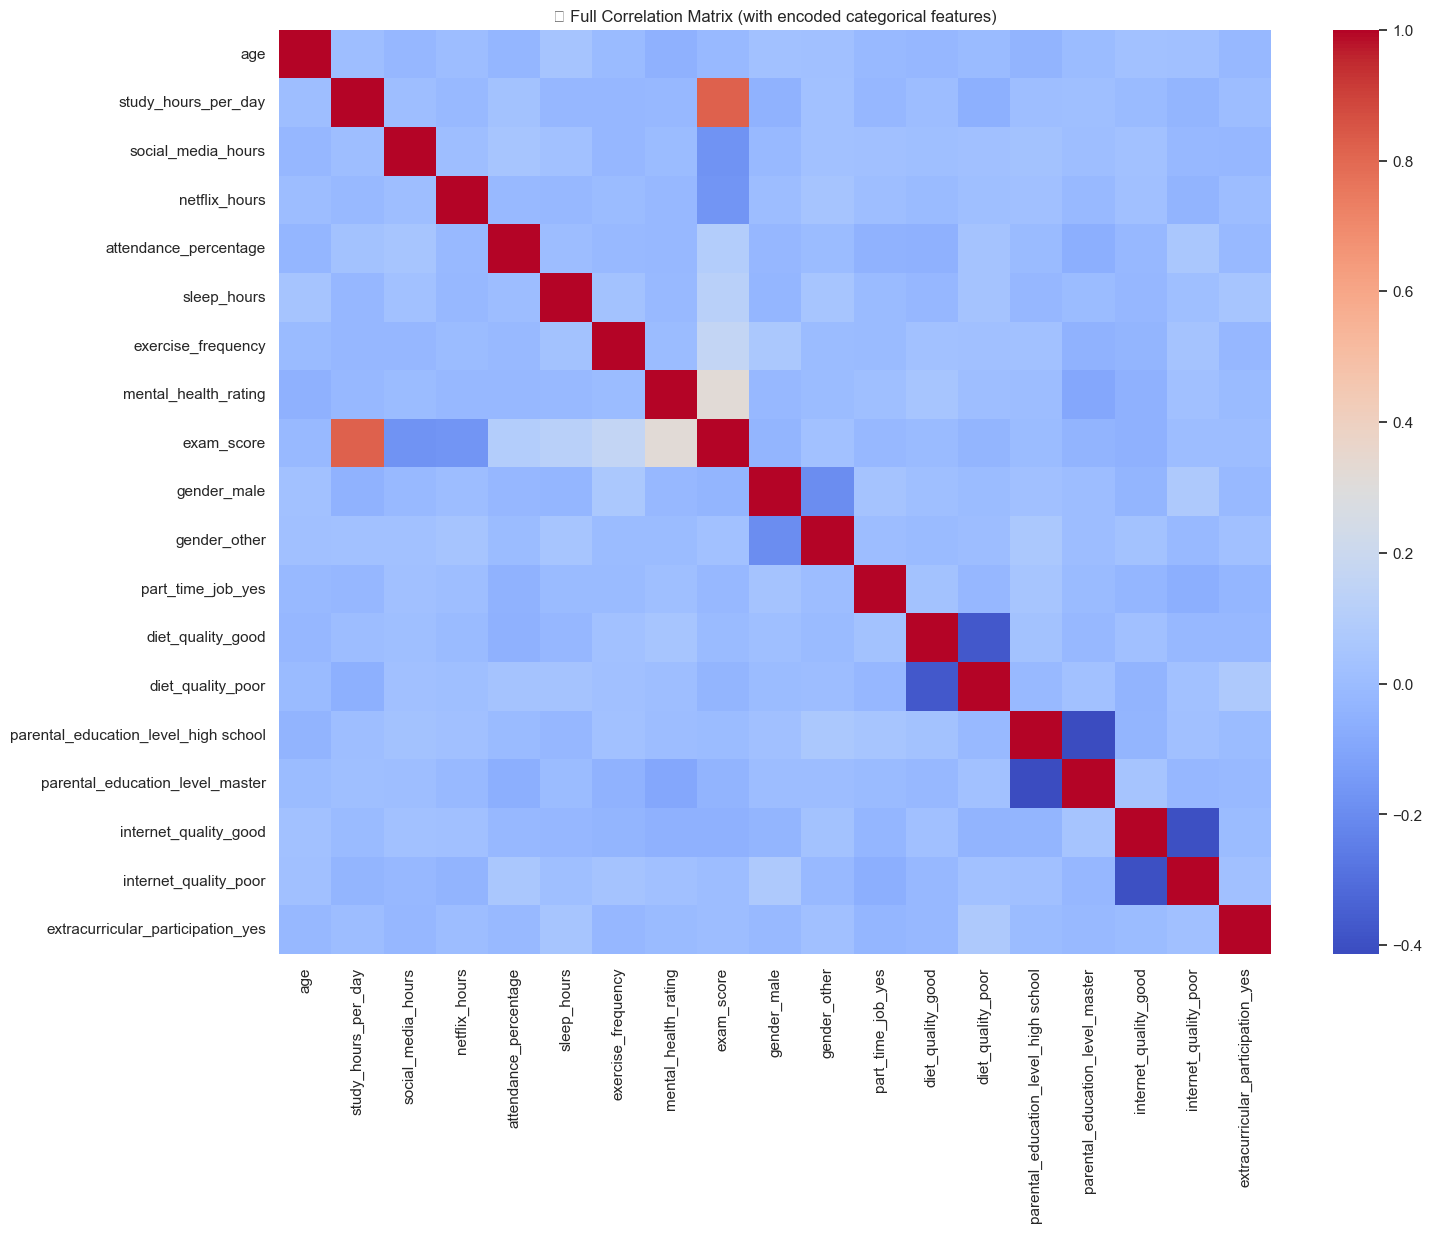

In [415]:
student_encoded = pd.get_dummies(student.drop(columns=["student_id"]), drop_first=True)

plt.figure(figsize=(16, 12))
sns.heatmap(student_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("🔍 Full Correlation Matrix (with encoded categorical features)")
plt.show()


## Step 3: Visualize Key Factors

We now use visualizations to explore how selected variables relate to `exam_score`.

Boxplots:
- Compare distributions across categories (e.g. mental health ratings, exercise).

Regplots:
- Show linear trend between continuous features and exam score.


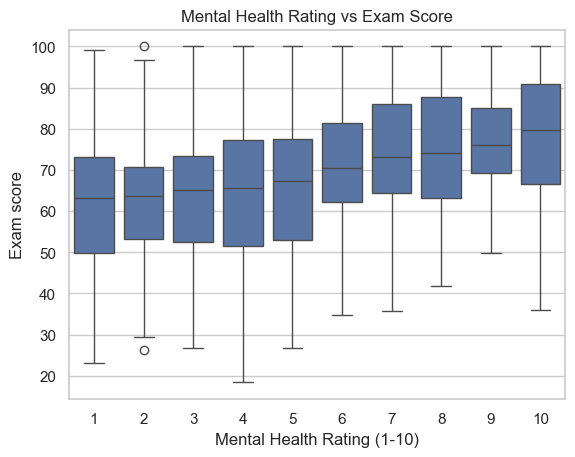

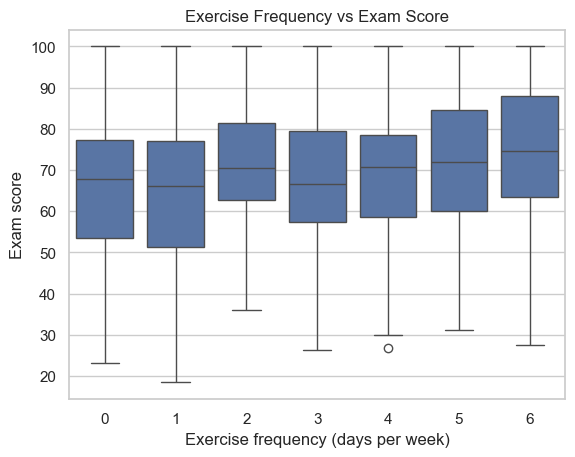

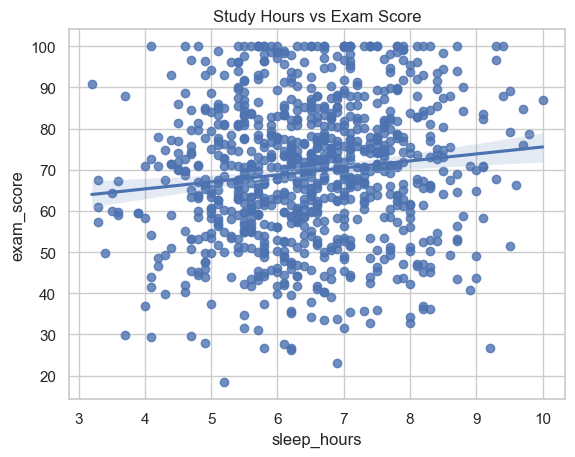

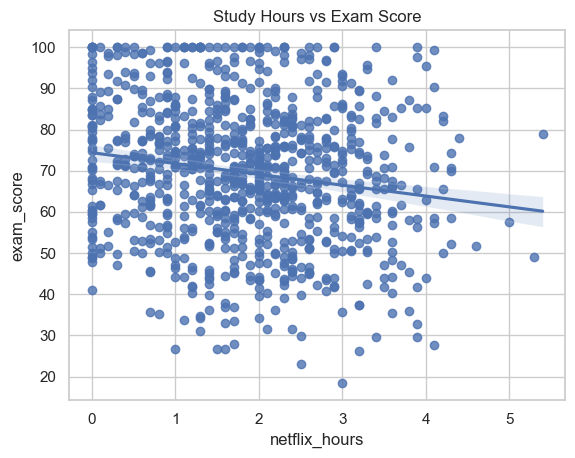

In [416]:
sns.boxplot(x='mental_health_rating', y='exam_score', data=student)
plt.title("Mental Health Rating vs Exam Score")
plt.xlabel("Mental Health Rating (1-10)")
plt.ylabel("Exam score")
plt.show()


sns.boxplot(x='exercise_frequency', y='exam_score', data=student)
plt.title("Exercise Frequency vs Exam Score")
plt.xlabel("Exercise frequency (days per week)")
plt.ylabel("Exam score")
plt.show()


sns.regplot(x='sleep_hours', y='exam_score', data=student)
plt.title("Study Hours vs Exam Score")
plt.show()

sns.regplot(x='netflix_hours', y='exam_score', data=student)
plt.title("Study Hours vs Exam Score")
plt.show()




## Step 4: Print Correlation Values

We now extract the actual numeric correlation values between `exam_score` and all other features.

This helps us:
- Rank the variables by importance.
- Select top predictors for modeling.


--- 


| Variable                  | Correlation | Interpretation |
|---------------------------|-------------|----------------|
| **study_hours_per_day**   | **0.82**    | Not surprisingly study hours have a very strong positive correlation – the more time students spend studying, the higher their exam scores. This is the **most important factor**. |
| **mental_health_rating**  | 0.32        | Moderate positive correlation – better mental health is associated with better academic performance. |
| **exercise_frequency**    | 0.16        | Weak positive correlation – physical activity may have a slight beneficial effect. |
| **sleep_hours**           | 0.12        | Weak positive – good sleep might help a little, but it's not a major driver on its own. |
| **attendance_percentage** | 0.10        | Weak positive correlation – attendance helps a bit, but it's not everything. |
| **age**                   | -0.01       | No real correlation – age does not appear to impact exam scores. |
| **netflix_hours**         | -0.17       | Weak negative correlation – more time spent on Netflix is associated with slightly lower scores. |
| **social_media_hours**    | -0.17       | Weak negative correlation – excessive use of social media may harm academic performance. |


In [417]:
correlations = student.corr(numeric_only=True)
exam_corr = correlations['exam_score'].sort_values(ascending=False)
print(exam_corr)


exam_score               1.000000
study_hours_per_day      0.822950
mental_health_rating     0.317945
exercise_frequency       0.161397
sleep_hours              0.122294
attendance_percentage    0.096005
age                     -0.012833
netflix_hours           -0.166578
social_media_hours      -0.171672
Name: exam_score, dtype: float64


In [418]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)



                 Feature  Importance
0    study_hours_per_day    0.550138
6   mental_health_rating    0.162564
5     exercise_frequency    0.081328
1     social_media_hours    0.071642
4            sleep_hours    0.056133
2          netflix_hours    0.044796
3  attendance_percentage    0.033399


## Decision tree

## Step 5: Convert Exam Score into Categories

We'll turn continuous `exam_score` into labeled categories:

- very_low
- low
- medium
- high
- very_high

This prepares the data for classification models.


In [419]:
def categorize_score_5(score):
    if score <= 40:
        return 'very_low'
    elif score <= 55:
        return 'low'
    elif score <= 70:
        return 'medium'
    elif score <= 85:
        return 'high'
    else:
        return 'very_high'

# Tilføj ny kolonne
student['exam_level'] = student['exam_score'].apply(categorize_score_5)

# Se fordeling
print(student['exam_level'].value_counts())


exam_level
high         290
medium       261
very_high    170
low          151
very_low      37
Name: count, dtype: int64


## Step 6: Prepare Data for Modeling

We now choose the most relevant features for predicting exam level, and split the dataset into training and testing sets.

- X = features (input)
- y = exam_level (target)

The split ensures we can evaluate the model on unseen data.


In [420]:
from sklearn.model_selection import train_test_split

features = [
    'study_hours_per_day',
    'social_media_hours', 
    'netflix_hours', 
    'attendance_percentage', 
    'sleep_hours', 
    'exercise_frequency', 
    'mental_health_rating', 
]

# Omdan kategoriske kolonner til numeriske med one-hot encoding
X = pd.get_dummies(student[features], drop_first=True)

X = student[features]
y = student['exam_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Feature Selection

We use statistical tests to score each feature and rank them by importance.

- SelectKBest with ANOVA F-test (f_classif)
- Higher score = more predictive power

This helps us focus on the most useful inputs.


In [421]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Se hvilke features der scorer højt
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


                 Feature       Score
0    study_hours_per_day  297.173295
6   mental_health_rating   19.315092
1     social_media_hours    6.488896
3  attendance_percentage    3.501828
5     exercise_frequency    3.355277
2          netflix_hours    3.211120
4            sleep_hours    3.135825


## Step 8: Train and Visualize Decision Tree

We train a decision tree classifier to predict exam level from the selected features.

Then we visualize the tree to understand how it makes decisions.


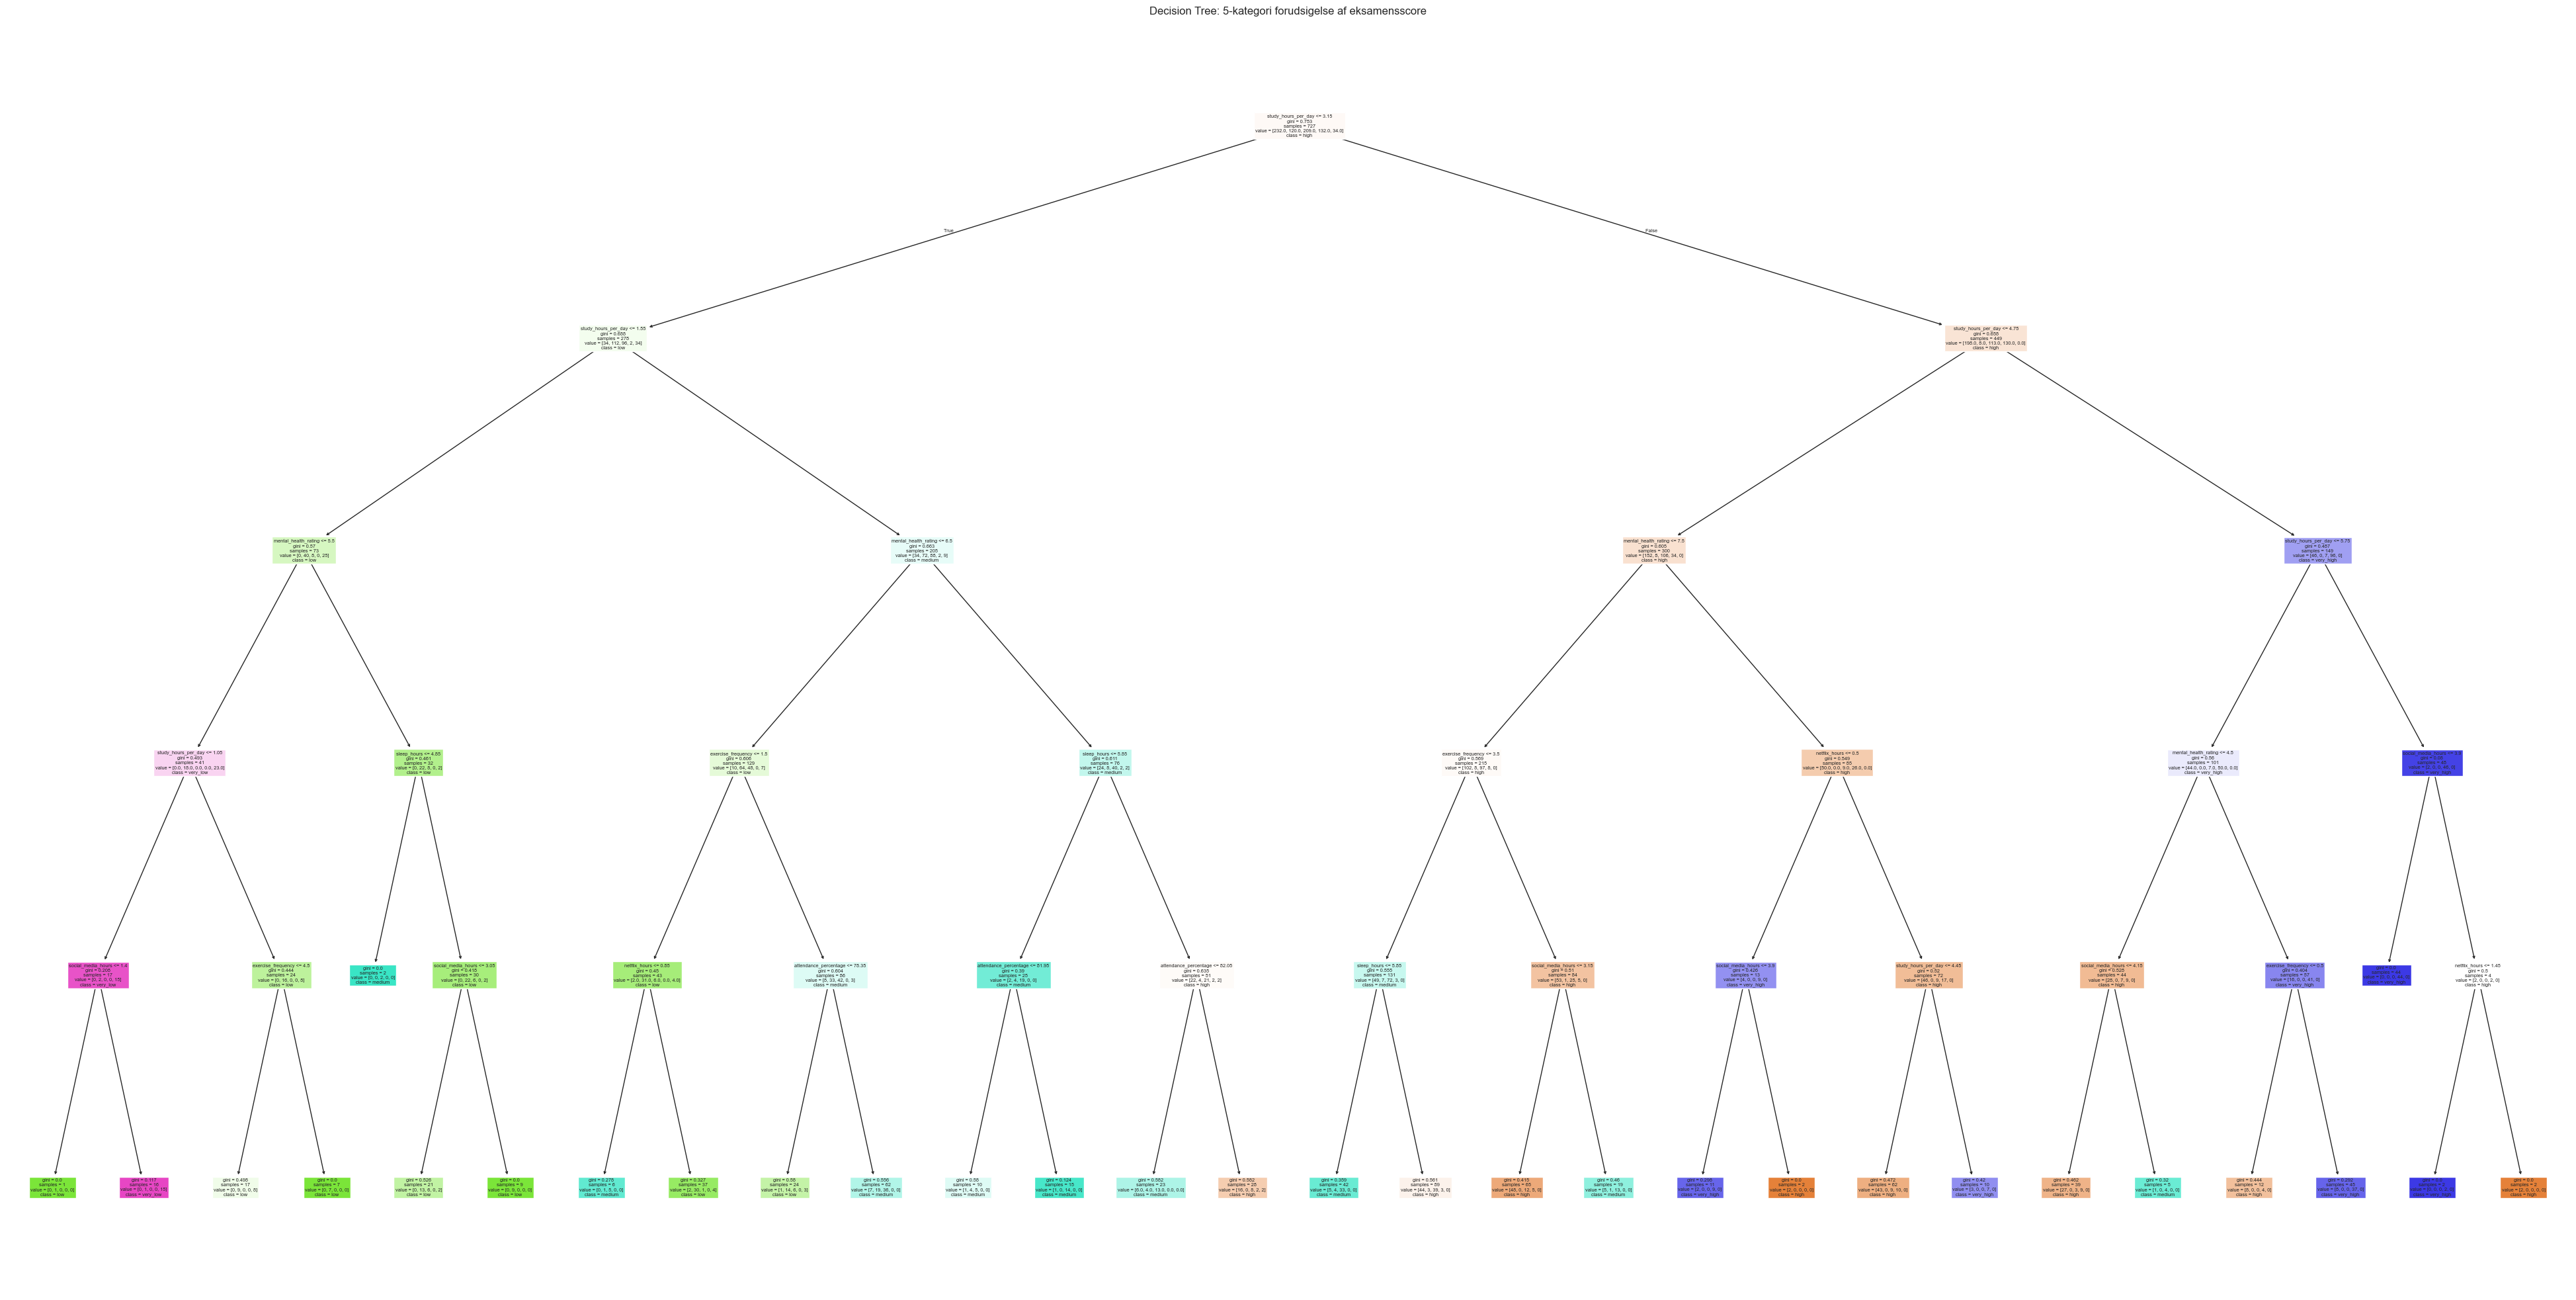

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Træn model
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Visualisér
plt.figure(figsize=(50, 25))
plot_tree(tree, feature_names=features, class_names=tree.classes_, filled=True)
plt.title("Decision Tree: 5-category prediction of exam score")
plt.show()


## Step 9: Evaluate Model Performance

We now check how well our model performed using:

- Precision, recall, and F1-score for each category
- These scores tell us how well the model classified each performance level


In [423]:
from sklearn.metrics import classification_report

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       0.51      0.64      0.56        58
         low       0.80      0.39      0.52        31
      medium       0.48      0.58      0.53        52
   very_high       0.87      0.68      0.76        38
    very_low       1.00      0.67      0.80         3

    accuracy                           0.59       182
   macro avg       0.73      0.59      0.64       182
weighted avg       0.63      0.59      0.59       182



## Classification Report Summary

#### Key metrics
* Accuracy: 0.59 (59%)

* Macro avg F1-score: 0.64

* Weighted avg F1-score: 0.59

---

#### Conclusion
* The model performs moderately well overall, with 59% accuracy.

* It predicts the "very_high" and "very_low" classes with the highest F1-scores, especially "very_low", though it has very few samples (3).

* It struggles more with "low", which has good precision (0.80) but poor recall (0.39), meaning it often misses "low" examples.

* Class imbalance might be affecting performance—some categories (like "very_low") are rare.

* The Decision Tree model likely overfits on small classes but doesn't generalize well across all categories.

